In [11]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df=sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# Imputer works on numbers, not strings. Convert to numbers, then impute, then convert back.

In [7]:
# lets do it

In [ ]:
# here we are going to take only numerical columns

In [19]:
num=df.dtypes[(df.dtypes == "int64") |( df.dtypes == "float64")].index

In [20]:
d=df[num]

In [21]:
x=d.drop("survived",axis=1)
y=d["survived"]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
x_train.head(10)

,pclass,age,sibsp,parch,fare
331,1,45.5,0,0,28.5000
733,2,23.0,0,0,13.0000
382,3,32.0,0,0,7.9250
704,3,26.0,1,0,7.8542
813,3,6.0,4,2,31.2750
118,1,24.0,0,1,247.5208
536,1,45.0,0,0,26.5500
361,2,29.0,1,0,27.7208
29,3,NaN,0,0,7.8958
55,1,NaN,0,0,35.5000


In [24]:
x_train.isna().sum()

pclass      0
age       140
sibsp       0
parch       0
fare        0
dtype: int64

# KNNImputer

In [25]:
from sklearn.impute import KNNImputer

In [94]:
knn = KNNImputer() # with default parameter
x_train_trf=knn.fit_transform(x_train)
x_test_trf=knn.transform(x_test)

In [95]:
new_x_train=pd.DataFrame(x_train_trf,columns=['new_pclass', 'new_age', 'new_sibsp', 'new_parch', 'new_fare']).head()

In [96]:
# compare the distribution of age before and after imputataion

In [97]:
new_x_train.head()

,new_pclass,new_age,new_sibsp,new_parch,new_fare
0,1.0,45.5,0.0,0.0,28.5000
1,2.0,23.0,0.0,0.0,13.0000
2,3.0,32.0,0.0,0.0,7.9250
3,3.0,26.0,1.0,0.0,7.8542
4,3.0,6.0,4.0,2.0,31.2750


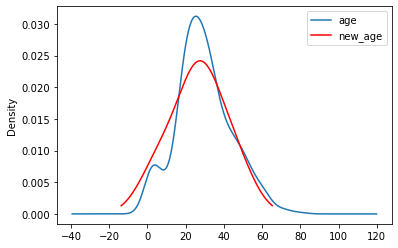

In [98]:
fig = plt.figure()

ax = fig.add_subplot(111)
# orignal 
x_train['age'].plot(kind='kde', ax=ax)
# after knn imputation
new_x_train.new_age.plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
# distribution is changed 

In [99]:
print("varience orignal",x_train["age"].var())
print("varience after knn imputation",new_x_train["new_age"].var())
# varience is not affected much 


varience orignal 210.2517072477438
varience after knn imputation 206.0


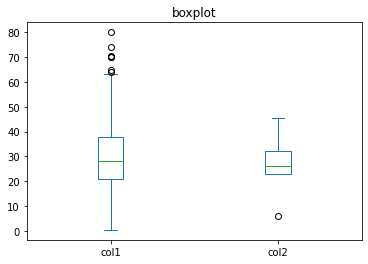

In [102]:
DF = pd.DataFrame({'col1': x_train["age"], 'col2': new_x_train['new_age']})
ax = DF[['col1', 'col2']].plot(kind='box', title='boxplot',)

plt.show()
# outliers are removd

In [101]:
#we can experiment with the value of k 

In [ ]:
# changing parameter -- weight to distnace (default= uniform)

In [103]:
knn = KNNImputer(weights="distance") 
x_train_trf=knn.fit_transform(x_train)
x_test_trf=knn.transform(x_test)

In [104]:
new_x_train=pd.DataFrame(x_train_trf,columns=['new_pclass', 'new_age', 'new_sibsp', 'new_parch', 'new_fare'])

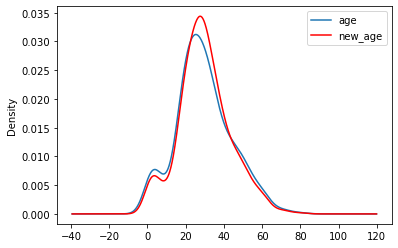

In [105]:
fig = plt.figure()

ax = fig.add_subplot(111)
# orignal 
x_train['age'].plot(kind='kde', ax=ax)
# after knn imputation
new_x_train.new_age.plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [106]:
# now  the distribution is similar 

In [107]:
print("varience orignal",x_train["age"].var())
print("varience after knn imputation",new_x_train["new_age"].var())
# varience is not affected much 

varience orignal 210.2517072477438
varience after knn imputation 182.67167038190303


In [108]:
# varience is decreased but not that much

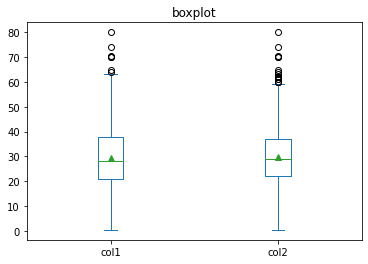

In [109]:
DF = pd.DataFrame({'col1': x_train["age"], 'col2': new_x_train['new_age']})
ax = DF[['col1', 'col2']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()
# outliers ARE increaed

## Multivariate Imputation by Chained Equations for Missing Value | MICE